In [1]:
import json, os, sys

from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

project_dir = os.path.abspath("..")
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)
    
import utils
import result_helper


sns.set(style="whitegrid")

In [2]:
skadi_job_paths = list(Path("../data/experiments-skadi/").glob("**/job-info.json"))
odin_job_paths = list(Path("../data/experiments-odin/").glob("**/job-info.json"))

job_paths = skadi_job_paths + odin_job_paths

df_data = result_helper.get_result_summary(job_paths)

cols_irrelavant = [
    "started_at", "completed_at", "precision_score", "recall_score", "f1_score", "random_seed",
    'experiment_type', 'experiment_name', 'component_size', 'variance', 'label_noise_proba',
    'allow_self_loops', 'distance_metric', 'job_path', 'duration_secs'
]
cols_relevant = list(set(df_data.columns) - set(cols_irrelavant))

## Introduction

### Purpose of the experiments

- Determine how to parameterize the data generator and the algorithm in order to fully recover the mixtures
  - How many steps should the random walker take before it stops?
  - What is the minimum separation?
  - How does the bias factor influence the performance?



### Default parameters in all experiments

- Number of Gaussian components $k$ is the same as the number of dimensions $d$
- Number of points in each Gaussian component: 50
- Variance in each component: 1
- No label noise added - to figure out how the algorithm behaves in the best case
- No self-loops


## Impact of separation on a single-step random walk

Experiment parameters:
- $\beta = k^{1/4}$
- Number of random walk steps: 1

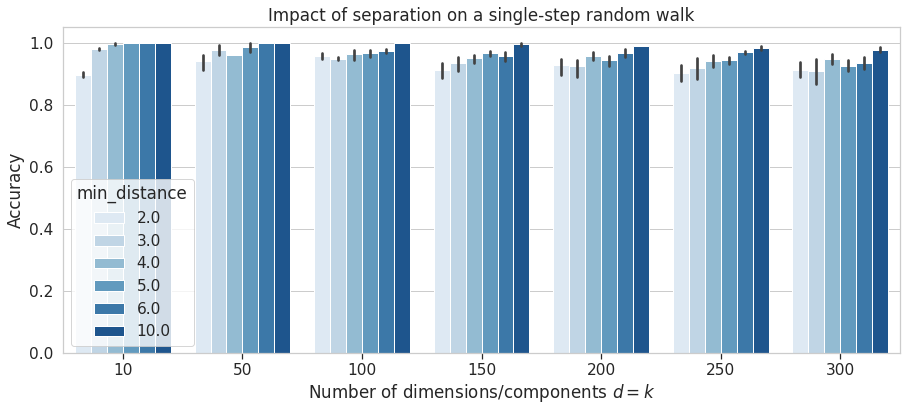

In [3]:
filter_dist_1 = df_data.experiment_name == "dim_dist_01"
filter_dist_2 = df_data.experiment_name == "dim_dist_02"
df_data_filtered = df_data[filter_dist_1 | filter_dist_2].copy()
df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.barplot(
        x="n_dim",y="accuracy_score",hue="min_distance",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title(f"Impact of separation on a single-step random walk");
    # ax.set_ylim([0, 1])

## Impact of short random walks

Experiment parameters: 
- $\beta = k^{1/4}$
- Separation: 2 or 3

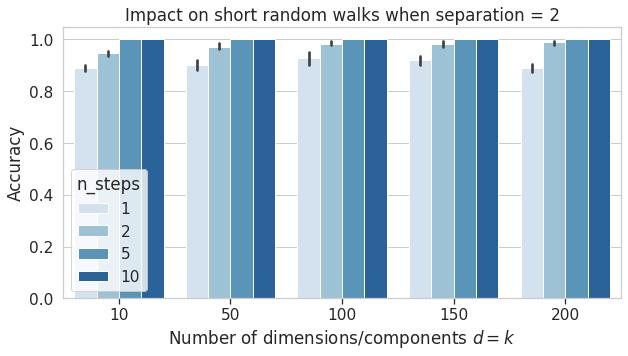

In [4]:
filter_steps_01 = df_data.experiment_name == "dim_steps_01"
df_data_filtered = df_data[filter_steps_01].copy()
df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(
        x="n_dim",y="accuracy_score", hue="n_steps",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title(f"Impact on short random walks when separation = 2");
    # ax.set_ylim([0, 1])

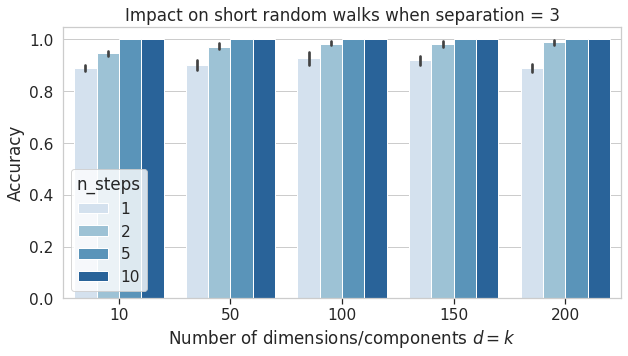

In [5]:
filter_steps_02 = df_data.experiment_name == "dim_steps_02"
df_data_filtered = df_data[filter_steps_01].copy()
df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(
        x="n_dim",y="accuracy_score", hue="n_steps",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title(f"Impact on short random walks when separation = 3");
    # ax.set_ylim([0, 1])

## Impact of long walks: $\ge$ 10 steps

Experiment parameters:
- $\beta = k^{1/4}$
- Separation: 2

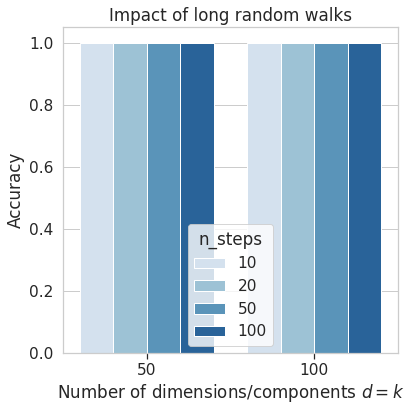

In [6]:
filter_steps_03 = df_data.experiment_name == "dim_steps_03"
filter_steps_04 = df_data.experiment_name == "dim_steps_04"
df_data_filtered = df_data[filter_steps_03 | filter_steps_04].copy()
df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.barplot(
        x="n_dim",y="accuracy_score", hue="n_steps",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title(f"Impact of long random walks");
    # ax.set_ylim([0, 1])

## Impact of no bias ($\beta = 1$) and long walks

Experiment parameters:
- $\beta = 1$
- Separation: 2

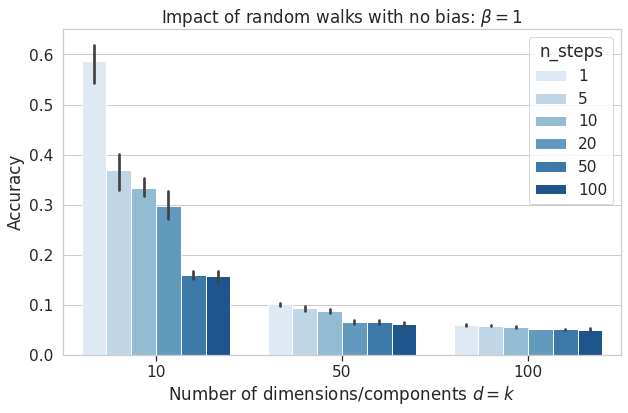

In [7]:
filter_dim_steps_no_bias_01 = df_data.experiment_name == "dim_steps_no_bias_01"
df_data_filtered = df_data[filter_dim_steps_no_bias_01].copy()
df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(
        x="n_dim",y="accuracy_score", hue="n_steps",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title(f"Impact of random walks with no bias: $\\beta = 1$");
    # ax.set_ylim([0, 1])

## Impact of bias factor $> 1$

Experiment parameters:
- $\beta = k^{1/m}$ where $m = \{ 512, 256, 128, 64, 32, 16, 8, 4 \}$
- Number of steps: 10
- Separation: 2


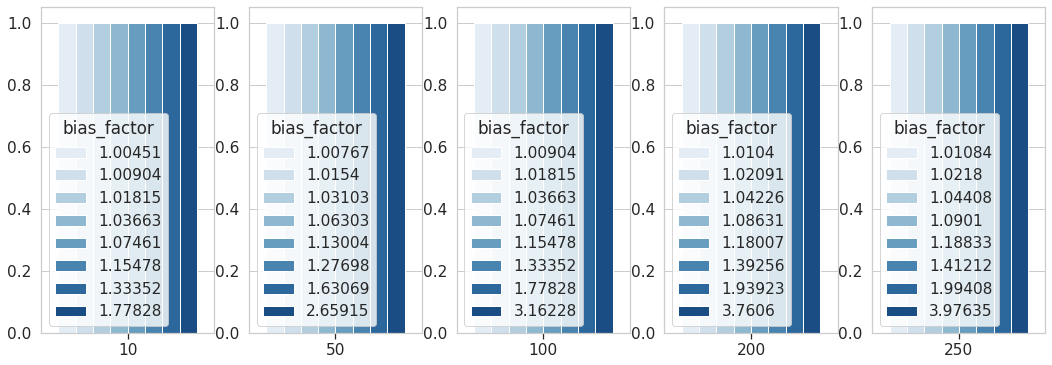

In [8]:
with sns.plotting_context("notebook", font_scale=1.4):
    fig, axes = plt.subplots(ncols=5, figsize=(18, 6))
    for i, n_dim in enumerate([10, 50, 100, 200, 250]):
        filter_dim_bias_01 = df_data.experiment_name == "dim_bias_01"
        filter_dim_bias_02 = df_data.experiment_name == "dim_bias_02"
        filter_dim_bias_03 = df_data.experiment_name == "dim_bias_03"
        filter_dim = df_data.n_dim == n_dim
        df_data_filtered = df_data[(filter_dim_bias_01 | filter_dim_bias_02 | filter_dim_bias_03) & filter_dim].copy()
        df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])
        df_data_filtered["bias_factor"] = df_data_filtered["bias_factor"].round(5)
        
        sns.barplot(
            x="n_dim",y="accuracy_score", hue="bias_factor",
            data=df_data_filtered,palette="Blues", ax=axes[i]
        )
        #ax.legend(title='Bias factor: $\\beta$', loc='upper left', labels=['1/4', '1/8', '1/16', '1/32'])
        axes[i].yaxis.grid(True)
        axes[i].yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
        axes[i].tick_params(which="both", bottom=True)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        axes[i].set_title(f"");

        # ax.set_ylim([0, 1])

## Impact of small separation, 1 & 1/2

Experiment parameters:
- $\beta = k^{1/4}$
- Number of steps: 10
- Separation: 1/2 or 1

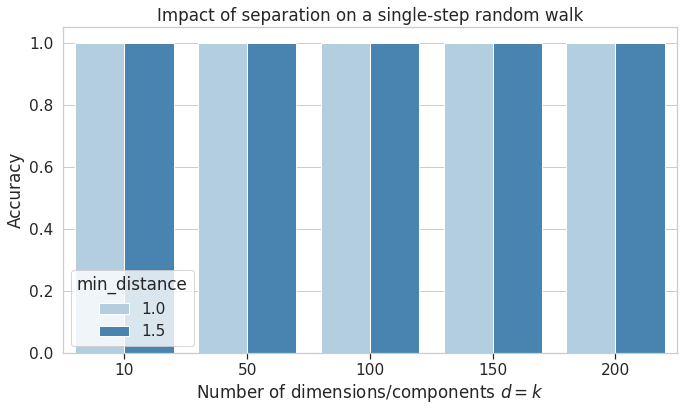

In [9]:
filter_small_dist_01 = df_data.experiment_name == "small_dist_01"
df_data_filtered = df_data[filter_small_dist_01].copy()
df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])

with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(11, 6))
    sns.barplot(
        x="n_dim",y="accuracy_score",hue="min_distance",
        data=df_data_filtered,palette="Blues", ax=ax
    )
    ax.yaxis.grid(True)
    ax.yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
    ax.tick_params(which="both", bottom=True)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of dimensions/components $d=k$")
    ax.set_title(f"Impact of separation on a single-step random walk");
    # ax.set_ylim([0, 1])

## Impact of separation $< 1$

Experiment parameters:
- $\beta = k^{1/4}$
- Number of steps: 10
- Separation: $\frac{1}{k^{1/m}}$ where $m = \{ 64, 16, 8, 4 \}$ 

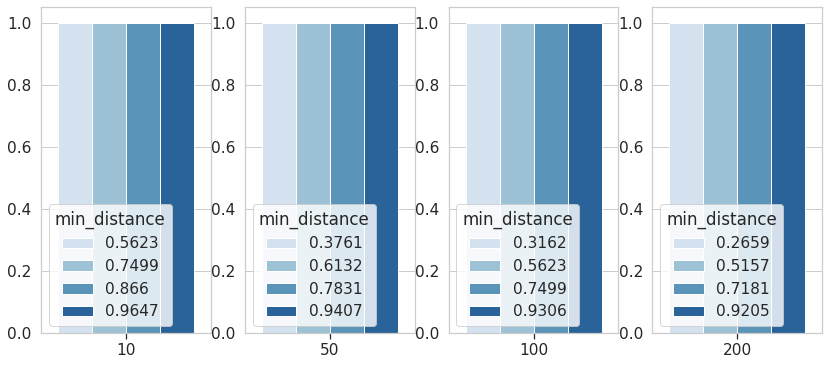

In [10]:
with sns.plotting_context("notebook", font_scale=1.4):
    fig, axes = plt.subplots(ncols=4, figsize=(14, 6))
    for i, n_dim in enumerate([10, 50, 100, 200]):
        filter_dist_below_one_01 = df_data.experiment_name == "dist_below_one_01"
        filter_dim = df_data.n_dim == n_dim
        df_data_filtered = df_data[filter_dist_below_one_01 & filter_dim].copy()
        df_data_filtered = df_data_filtered.sort_values(["min_distance", "n_dim", "bias_factor", "n_steps"])
        df_data_filtered["min_distance"] = df_data_filtered["min_distance"].round(4)
        
        sns.barplot(
            x="n_dim",y="accuracy_score",hue="min_distance",
            data=df_data_filtered,palette="Blues", ax=axes[i]
        )
        axes[i].yaxis.grid(True)
        axes[i].yaxis.set_minor_locator(ticker.LinearLocator(numticks=10))
        axes[i].tick_params(which="both", bottom=True)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        #axes[i].set_title(f"Impact of separation < 1");
        # ax.set_ylim([0, 1])